In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Train test split
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("fraud_data.csv")
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [3]:
data=df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [5]:
df.nunique()

trans_date_trans_time    12126
merchant                   693
category                    14
amt                       9266
city                       176
state                       13
lat                        183
long                       183
city_pop                   174
job                        163
dob                        187
trans_num                14383
merch_lat                14376
merch_long               14380
is_fraud                     4
dtype: int64

In [6]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [8]:
df['dob'].unique()

array(['09-11-1939', '14-07-1954', '21-06-1974', '12-06-1955',
       '10-02-1935', '23-04-1987', '07-10-1992', '30-11-1987',
       '17-07-1989', '25-06-1970', '16-06-1961', '31-03-1959',
       '23-12-1974', '16-05-1973', '11-11-1965', '24-01-1967',
       '22-06-1964', '04-04-1996', '17-02-1986', '12-03-1960',
       '18-11-1987', '31-03-1985', '08-11-1940', '04-10-1991',
       '05-07-1981', '21-08-1985', '01-04-1996', '29-09-1999',
       '07-08-1938', '18-04-1972', '31-05-1948', '25-04-1971',
       '06-05-1929', '09-09-1927', '06-04-1964', '15-12-1965',
       '27-05-1967', '11-04-1976', '04-01-1988', '13-09-1940',
       '24-11-1989', '05-07-1954', '03-04-1985', '13-03-1963',
       '13-06-1983', '11-09-1993', '01-09-1984', '18-01-1997',
       '18-12-1961', '21-12-1945', '16-04-1974', '15-09-1950',
       '06-02-1937', '17-04-1957', '04-10-1967', '13-07-1973',
       '29-12-1992', '01-08-1984', '31-05-1999', '27-11-1992',
       '22-09-1972', '23-05-1987', '27-09-1970', '20-03

In [11]:
from datetime import datetime
def calculate_age(dob):
    dob = datetime.strptime(dob, '%d-%m-%Y')  # Adjust the format if necessary
    today = datetime.today()
    age = today.day - dob.day - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the DOB column
df['age'] = df['dob'].apply(calculate_age)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
 15  ag

In [13]:
df.select_dtypes('object')

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,Wales,AK,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,Wales,AK,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,Wales,AK,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,Wales,AK,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,Wales,AK,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,1
...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,Athena,OR,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,Gardiner,OR,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,Alva,WY,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,Wales,AK,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,0


In [15]:
df.drop(columns=['dob'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  trans_num              14446 non-null  object 
 11  merch_lat              14446 non-null  float64
 12  merch_long             14446 non-null  float64
 13  is_fraud               14446 non-null  object 
 14  age                    14446 non-null  int64  
dtypes:

In [17]:
df.select_dtypes('object')

,trans_date_trans_time,merchant,category,city,state,job,trans_num,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,Wales,AK,"""Administrator, education""",a3806e984cec6ac0096d8184c64ad3a1,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,Wales,AK,"""Administrator, education""",a59185fe1b9ccf21323f581d7477573f,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,Wales,AK,"""Administrator, education""",86ba3a888b42cd3925881fa34177b4e0,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,Wales,AK,"""Administrator, education""",3a068fe1d856f0ecedbed33e4b5f4496,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,Wales,AK,"""Administrator, education""",891cdd1191028759dc20dc224347a0ff,1
...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,Athena,OR,Dealer,699a4c06b22711bf3e0d8ef91232d356,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,Gardiner,OR,"""Engineer, maintenance""",080d620d24815c7d6c637cf0b71dde8e,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,Alva,WY,"""Administrator, local government""",3c346c8cd627c5fe3ed57430db2e9ae7,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,Wales,AK,"""Administrator, education""",e66ffcc95ba7fc490486242af1205d04,0


In [21]:
df.select_dtypes('number')

,amt,lat,long,city_pop,merch_lat,merch_long,age
0,14.37,64.7556,-165.6723,145,65.654142,-164.722603,17
1,966.11,64.7556,-165.6723,145,65.468863,-165.473127,17
2,49.61,64.7556,-165.6723,145,65.347667,-165.914542,17
3,295.26,64.7556,-165.6723,145,64.445035,-166.080207,17
4,18.17,64.7556,-165.6723,145,65.447094,-165.446843,17
...,...,...,...,...,...,...,...
14441,122.00,45.8289,-118.4971,1302,46.442439,-118.524214,8
14442,9.07,43.7857,-124.1437,260,42.901265,-124.995317,25
14443,104.84,44.6873,-104.4414,110,45.538062,-104.542117,10
14444,268.16,64.7556,-165.6723,145,64.081462,-165.898698,17


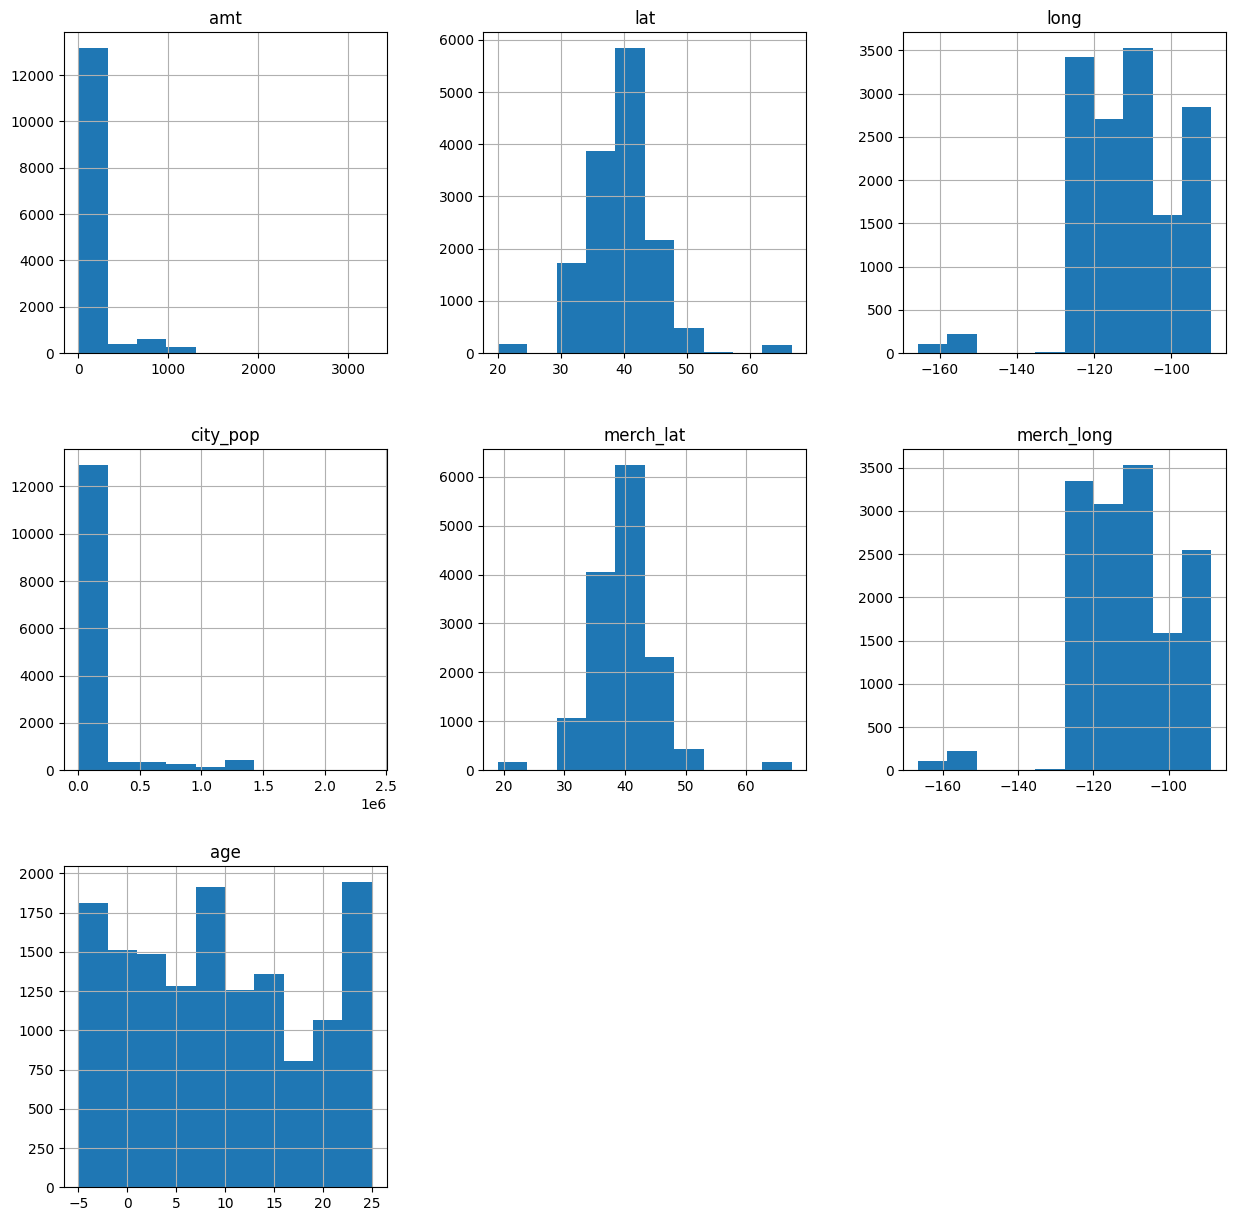

In [23]:
df.hist(figsize = (15, 15))
plt.show()

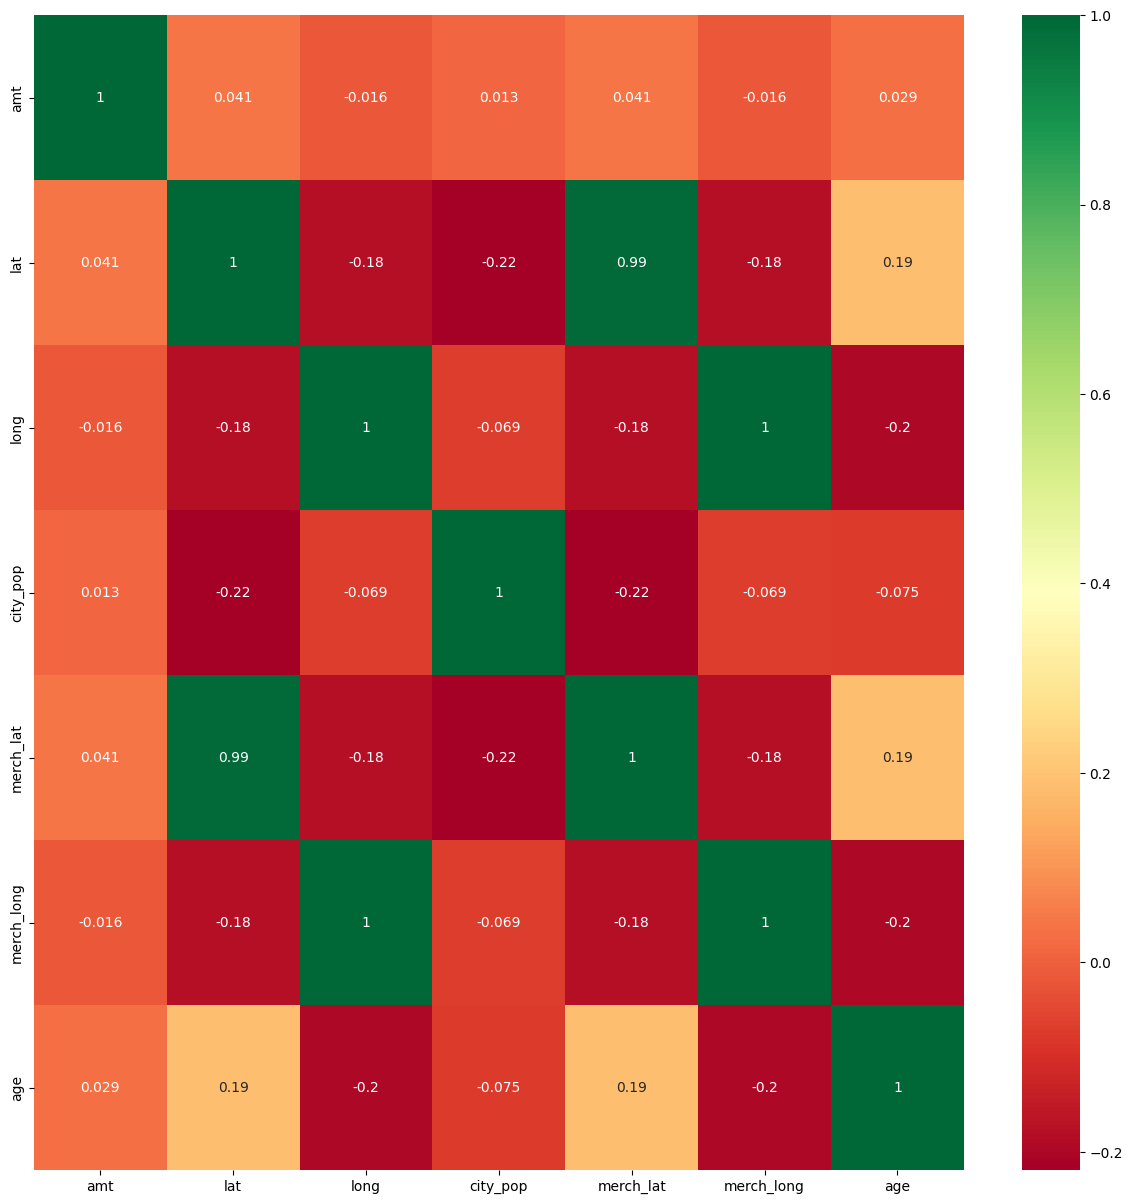

In [27]:
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

Text(0, 0.5, 'Frequency')

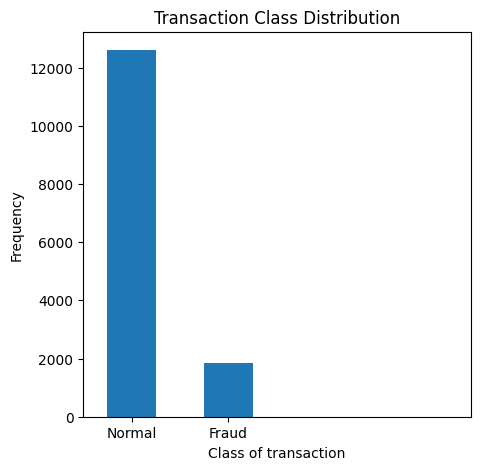

In [29]:
plt.figure(figsize=(5,5))
count_classes = pd.value_counts(df['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS = ['Normal','Fraud']
plt.xticks(range(2), LABELS)
plt.xlabel("Class of transaction")
plt.ylabel("Frequency")

In [30]:
df['is_fraud'].unique()

array(['1', '1"2020-12-24 16:56:24"', '0', '0"2019-01-01 00:00:44"'],
      dtype=object)

In [31]:
df['is_fraud'].replace({'1':1,'0':0,'1"2020-12-24 16:56:24"':0,'0"2019-01-01 00:00:44"':0},inplace=True)

In [32]:
df['is_fraud'].unique()

array([1, 0])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  trans_num              14446 non-null  object 
 11  merch_lat              14446 non-null  float64
 12  merch_long             14446 non-null  float64
 13  is_fraud               14446 non-null  int64  
 14  age                    14446 non-null  int64  
dtypes:

In [36]:
def dropCol(data):
    col_to_drop = ['trans_date_trans_time','merchant','trans_num']
    res = data.drop(col_to_drop,axis = 1,inplace=True)
    return res

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  trans_num              14446 non-null  object 
 11  merch_lat              14446 non-null  float64
 12  merch_long             14446 non-null  float64
 13  is_fraud               14446 non-null  int64  
 14  age                    14446 non-null  int64  
dtypes:

In [38]:
df.drop(columns=['trans_date_trans_time','trans_num'],inplace=True)
df

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
0,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.654142,-164.722603,1,17
1,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.468863,-165.473127,1,17
2,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.347667,-165.914542,1,17
3,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",64.445035,-166.080207,1,17
4,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",65.447094,-165.446843,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,46.442439,-118.524214,0,8
14442,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",42.901265,-124.995317,0,25
14443,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",45.538062,-104.542117,0,10
14444,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",64.081462,-165.898698,0,17


In [39]:
label_encoded_cols = ['merchant', 'category', 'city', 'state', 'job']
for col in label_encoded_cols:
    df[col] = df[col].astype('category').cat.codes

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    14446 non-null  int16  
 1   category    14446 non-null  int8   
 2   amt         14446 non-null  float64
 3   city        14446 non-null  int16  
 4   state       14446 non-null  int8   
 5   lat         14446 non-null  float64
 6   long        14446 non-null  float64
 7   city_pop    14446 non-null  int64  
 8   job         14446 non-null  int16  
 9   merch_lat   14446 non-null  float64
 10  merch_long  14446 non-null  float64
 11  is_fraud    14446 non-null  int64  
 12  age         14446 non-null  int64  
dtypes: float64(5), int16(3), int64(3), int8(2)
memory usage: 1015.9 KB


In [41]:
target = "is_fraud"
features = [
    "merchant", "category", "amt", "city","merch_lat",
    "state", "lat", "long","city_pop","job","merch_long"
]

X = df[features]
y = df[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)       # Transform the test data


In [44]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [46]:
print("Accuracy:", accuracy)

Accuracy: 0.9245674740484429


In [47]:
confusion_matrix(y_test, y_pred)

array([[2485,   20],
       [ 198,  187]])

In [65]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
y_pred_prob

array([0.04768212, 0.01810372, 0.06871704, ..., 0.02894039, 0.00862558,
       0.02855267])

In [55]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])

In [62]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2505
           1       0.90      0.49      0.63       385

    accuracy                           0.92      2890
   macro avg       0.91      0.74      0.79      2890
weighted avg       0.92      0.92      0.91      2890



In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[2485   20]
 [ 198  187]]


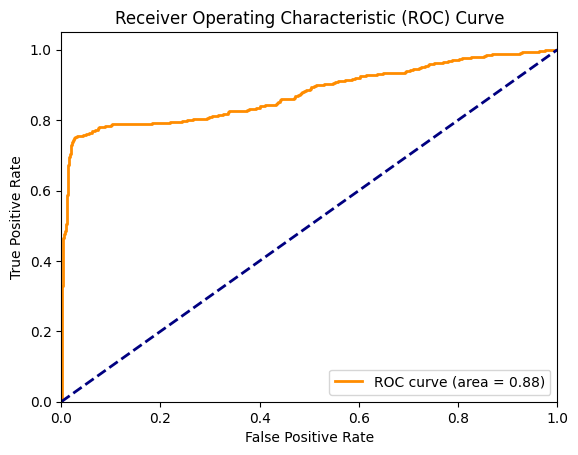

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc #import necessary metrix function
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
